In [48]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

from matplotlib import style
import mplfinance as mpf

---

### Stock price data

In [10]:
style.use('ggplot')

In [11]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2020, 12, 31)

df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')

---

### Handling data & graphing

In [12]:
df = pd.read_csv('tsla.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
1,2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2,2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
3,2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
4,2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


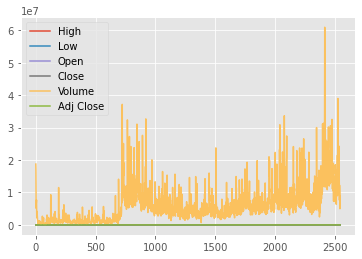

In [13]:
df.plot();

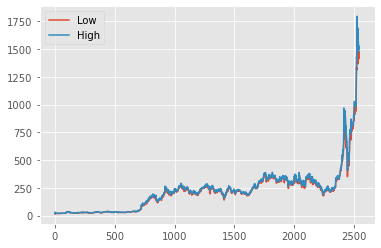

In [20]:
df[['Low', 'High']].plot();

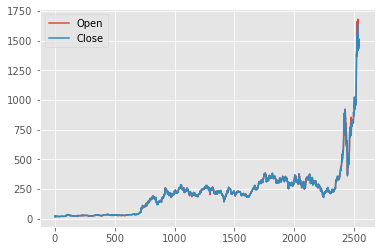

In [21]:
df[['Open', 'Close']].plot();

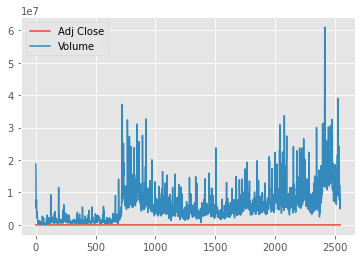

In [22]:
df[['Adj Close', 'Volume']].plot();

---

### Stock - Part 1

In [32]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [33]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


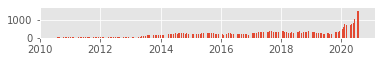

In [42]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)

#ax1.plot(df.index, df['Adj Close']);
#ax1.bar(df.index, df['100ma']);
ax2.bar(df.index, df['Adj Close']);

---

### Stock - Part 2

In [43]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [44]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [49]:
df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1.xaxis_date()

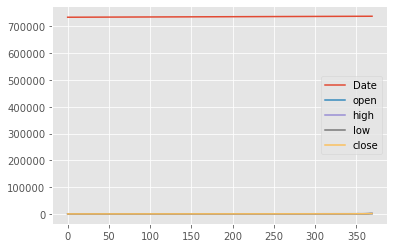

In [53]:
df_ohlc.plot()